In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

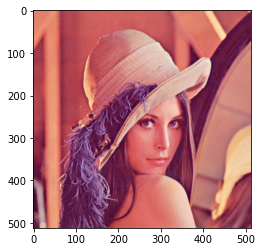

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

In [5]:
def median_filter(img, ksize):
    result = img
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
#                 result[row, col, channel] = img[row, col, channel]
                
                filter_area = img[row:row+ksize, col:col+ksize, channel]
                if row+int(ksize/2) < img.shape[0] and col+int(ksize/2) < img.shape[1]:
                    result[row+int(ksize/2), col+int(ksize/2), channel] = np.median(filter_area)
                else:
                    break
    return result

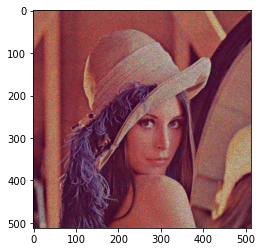

In [6]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

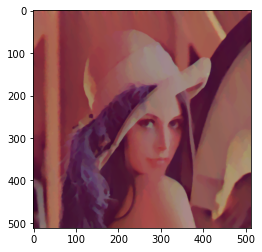

In [8]:
from ipywidgets import interact

def median_filter_show(ksize = 3):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

median_filter_show()